In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
from sklearn.preprocessing import LabelEncoder
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [2]:
df=pd.read_csv("spam.csv", encoding="latin1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df.rename(columns={'v1': 'output', 'v2': 'SMS'}, inplace=True)
df

,output,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   output  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
encoder =LabelEncoder()
df['output']=encoder.fit_transform(df['output'])
df

,output,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


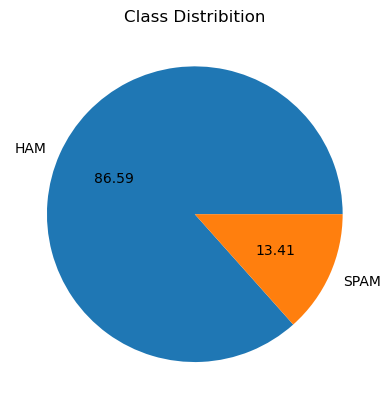

In [7]:
plt.title("Class Distribition")
plt.pie(df['output'].value_counts(),labels=['HAM','SPAM'],autopct="%0.2f")
plt.show()



In [25]:
print(f'Null values\n{df.isnull().sum()}')

Null values
output       0
SMS          0
Trans_SMS    0
dtype: int64


In [9]:
df['SMS'].duplicated().sum()


403

In [10]:
#removing Duplicates
df = df.drop_duplicates(subset='SMS')
print(f'number of duplicates:{df['SMS'].duplicated().sum()}')

number of duplicates:0


# DATA PREPROCESSING
+ lowercasing and removing whitespaces  
+ Removing Html tags
+ Removing punctuation 
+ tokenization  
+ chat word treatment   
+ removing special character   
+ removing stop words 
+ stemming  

lowecasing and removing whitespaces

In [11]:

df.loc[:,'Trans_SMS']=df['SMS'].str.strip().str.lower()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19808\3805755606.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Trans_SMS']=df['SMS'].str.strip().str.lower()


Removing Html Tag

In [12]:
def remove_html_tags(text):
    pattern = re.compile(r'<.*?>')
    return pattern.sub('', str(text))


has_html = df['Trans_SMS'].str.contains(r'<.*?>', regex=True).value_counts()
print(f'\tHTML TAGS\n{has_html}')


df.loc[:,'Trans_SMS'] = df['Trans_SMS'].apply(remove_html_tags)

has_html = df['Trans_SMS'].str.contains(r'<.*?>', regex=True).value_counts()
print(f'\n\tAfter removing HTML TAGS\n{has_html}')



	HTML TAGS
Trans_SMS
False    5163
True        6
Name: count, dtype: int64

	After removing HTML TAGS
Trans_SMS
False    5169
Name: count, dtype: int64


Removing Punctuation

In [13]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

df.loc[:,'Trans_SMS']=df['Trans_SMS'].apply(remove_punctuation)
df['Trans_SMS']

0       go until jurong point crazy available only in ...
1                                 ok lar joking wif u oni
2       free entry in 2 a wkly comp to win fa cup fina...
3             u dun say so early hor u c already then say
4       nah i dont think he goes to usf he lives aroun...
                              ...                        
5567    this is the 2nd time we have tried 2 contact u...
5568                  will ì b going to esplanade fr home
5569    pity  was in mood for that soany other suggest...
5570    the guy did some bitching but i acted like id ...
5571                            rofl its true to its name
Name: Trans_SMS, Length: 5169, dtype: object

Chat word Treatment

In [14]:
#slang.csv url:https://github.com/bodhwani/NLP-VIT-BOT/blob/master/slangs.csv

df_chats_word=pd.read_csv('slangs.csv',encoding='latin1')
df_chats_word.drop(columns='Unnamed: 0')

df_chats_word.loc[:,'Abbr']=df_chats_word['Abbr'].str.strip().str.lower()
df_chats_word.loc[:,'Fullform']=df_chats_word['Fullform'].str.strip().str.lower()
chatwords = dict(zip(df_chats_word['Abbr'], df_chats_word['Fullform']))


def remove_chat_word(txt):
    lst=nltk.word_tokenize(txt)
    return [chatwords.get(word, word) for word in lst]

df.loc[:,'Trans_SMS']=df['Trans_SMS'].apply(remove_chat_word).apply(' '.join)

df['Trans_SMS'].sample(5)

4522    actually i decided i was too hungry so i haven...
1757                  miss you need you want you love you
1242    nobody can decide where to eat and dad wants c...
3266       only kidding then i come and pick you at engin
3763    would me smoking you out help united states wo...
Name: Trans_SMS, dtype: object

Removing Special Character 

In [15]:
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s]', '', text)

df.loc[:,'Trans_SMS']=df['Trans_SMS'].apply(remove_special_characters)
df['Trans_SMS'].sample(10)


154     you are everywhere low grade marijuana on the ...
3132                      so no offence messages had food
3253                     i can make lasagna for you vodka
4860                                 nokia phone is lovly
4238    sez hows you the arab boy hope you are all goo...
2901    bill as in are there any letters for me im exp...
2242    no with my sister lor aft bathing my telephone...
930     i am really sorry i wont be able to do this fr...
238     new theory argument wins d situation but loses...
1603    have you heard about that job i am going to th...
Name: Trans_SMS, dtype: object

Removing Stoppwards

In [16]:
stop_words = set(nltk.corpus.stopwords.words('english'))
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df.loc[:,'Trans_SMS']=df["Trans_SMS"].apply(remove_stopwords)
df['Trans_SMS'].sample(10)

3619           meant apology texting get drugs ltgt night
4001                get gift year didnt get anything good
1149                                    drop large person
1914    new textbuddy chat turned guys area 4 25p free...
3079    ssi thinl role like sachinjust standing others...
226     meet dream partner soon career flyng start fin...
2907    must whatever stay touch around wait summer da...
1327    balance 500 next question sang uptown girl eig...
2520    misplaced number sending texts old number wond...
3883    link picture sent also use httpalto18coukwavew...
Name: Trans_SMS, dtype: object

Stemming

In [17]:
ps = PorterStemmer()

def stemming(txt):
    return ' '.join(ps.stem(word) for word in nltk.word_tokenize(txt))

df.loc[:,'Trans_SMS']=df['Trans_SMS'].apply(stemming)
df['Trans_SMS'].sample(10)


2911          didnt tell thatnow think plu he go stop run
1547    bishan lar nearer offenc need buy earli buy go...
4907                                   solihul want anyth
1450                                   messag rajini come
1406    urgent import inform o2 someon use peopl gain ...
4372                                   fineabsolutli fine
3422    mobil 10 mth updat latest orang cameravideo ph...
2287    alex know guy sell mid he south tampa dont thi...
2555    freemsg award free mini digit camera repli dis...
221     oper system call ubandu run without instal har...
Name: Trans_SMS, dtype: object

# Vectorization

In [18]:
tfidf=TfidfVectorizer()
X = tfidf.fit_transform(df['Trans_SMS']).toarray()
X.shape

(5169, 7618)

In [19]:
y=df['output'].values

# Model Training

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [21]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [22]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred1)}]n") 
print(f"confusion_matrix\n{confusion_matrix(y_test,y_pred1)}\n") 
print(f"precision_score: {precision_score(y_test,y_pred1)}\n")

Accuracy: 0.8491295938104448]n
confusion_matrix
[[758 138]
 [ 18 120]]

precision_score: 0.46511627906976744



In [23]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred2)}]n") 
print(f"confusion_matrix\n{confusion_matrix(y_test,y_pred2)}\n") 
print(f"precision_score: {precision_score(y_test,y_pred2)}\n")

Accuracy: 0.9506769825918762]n
confusion_matrix
[[896   0]
 [ 51  87]]

precision_score: 1.0



In [24]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test,y_pred3)}]n") 
print(f"confusion_matrix\n{confusion_matrix(y_test,y_pred3)}\n") 
print(f"precision_score: {precision_score(y_test,y_pred3)}\n")

Accuracy: 0.9748549323017408]n
confusion_matrix
[[894   2]
 [ 24 114]]

precision_score: 0.9827586206896551

